In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt    
import math

In [2]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



In [4]:
y_train

array([7, 6, 0, ..., 9, 5, 4], dtype=int64)

In [5]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def sigmoid(NETj):
    return 1 / (1 + np.exp(-NETj))

def Relu(net):
    return np.maximum(0,net)
def dev_Relu(net):
    return net > 0
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def sigmoid_derivative(Net):
    sig = sigmoid(Net)
    return sig * (1-sig)

def forward_prop(W1,b1,W2,b2,X):
    # print(X.shape)
    # print(W1.shape)
    net1 = np.dot(W1,X) + 1
    O1 = sigmoid(net1)
    net2 = W2.dot(O1) + 1
    O2 = softmax(net2)
    return net1,O1,net2,O2

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

def back_prop(net1, o1, net2, o2, W2, X, y):
    one_hot_y = one_hot(y)
    d_net2 = o2 - one_hot_y
    dw2 = 1 / m * d_net2.dot(o1.T)
    db2 = 1 /m * np.sum(d_net2, 1)  
    d_net1 = W2.T.dot(d_net2) * sigmoid_derivative(net1)
    dw1 = 1 / m * d_net1.dot(X.T)
    db1 = 1 / m * np.sum(d_net1, 1)  
    return dw1, db1, dw2, db2

def update(W1, b1, W2, b2, dW1, db1, dW2, db2, rate):
    W1 = W1 - rate * dW1
    b1 = b1 - rate * db1    
    W2 = W2 - rate * dW2  
    b2 = b2 - rate * db2    
    return W1, b1, W2, b2
    

In [9]:
def get_predictions(o2):
    return np.argmax(o2,0)
def get_accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions ==  y) / y.size
def gradient_descent(X,y,iterations, rate):
    w1,b1,w2,b2 = init_params()
    for i in range(iterations):
        net1,o1,net2,o2 = forward_prop(w1,b1,w2,b2,X)
        dw1, db1, dw2, db2 = back_prop(net1,o1,net2,o2,w2,X,y)
        w1,b1,w2,b2 = update(w1,b1,w2,b2,dw1,db1,dw2,db2,rate)
        if(i % 50 == 0):
            print("iteration: ",i)
            print("accuracy: ",get_accuracy(get_predictions(o2),y))
    return w1,b1,w2,b2

In [7]:
print(X_train.shape)
print(X_train)

(784, 41000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
w1,b1,w2,b2 = gradient_descent(X_train,y_train,800,0.8)

iteration:  0
[4 4 4 ... 4 7 4] [7 6 0 ... 9 5 4]
accuracy:  0.09048780487804878
iteration:  50
[7 6 0 ... 9 7 4] [7 6 0 ... 9 5 4]
accuracy:  0.6599268292682927
iteration:  100
[7 6 0 ... 9 2 4] [7 6 0 ... 9 5 4]
accuracy:  0.788829268292683
iteration:  150
[7 6 0 ... 9 0 4] [7 6 0 ... 9 5 4]
accuracy:  0.8308048780487804
iteration:  200
[7 6 0 ... 9 0 4] [7 6 0 ... 9 5 4]
accuracy:  0.8508292682926829
iteration:  250
[7 6 0 ... 9 0 4] [7 6 0 ... 9 5 4]
accuracy:  0.864
iteration:  300
[7 6 0 ... 9 0 4] [7 6 0 ... 9 5 4]
accuracy:  0.873780487804878
iteration:  350
[7 6 0 ... 9 0 9] [7 6 0 ... 9 5 4]
accuracy:  0.8816341463414634
iteration:  400
[7 6 0 ... 9 0 9] [7 6 0 ... 9 5 4]
accuracy:  0.887219512195122
iteration:  450
[7 6 0 ... 9 0 4] [7 6 0 ... 9 5 4]
accuracy:  0.8918536585365854
iteration:  500
[7 6 0 ... 9 0 4] [7 6 0 ... 9 5 4]
accuracy:  0.8955609756097561
iteration:  550
[7 6 0 ... 9 0 4] [7 6 0 ... 9 5 4]
accuracy:  0.8985121951219512
iteration:  600
[7 6 0 ... 9 0 4] 

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, o2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(o2) 
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction:", prediction)
    print("Label:", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [4]
Label: 4


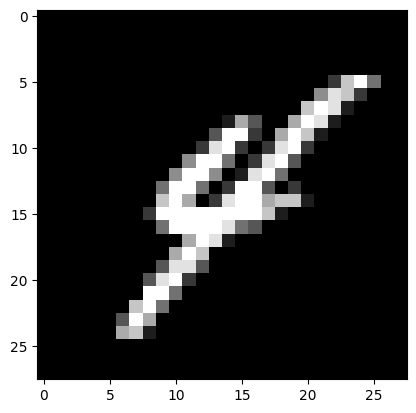

Prediction: [6]
Label: 6


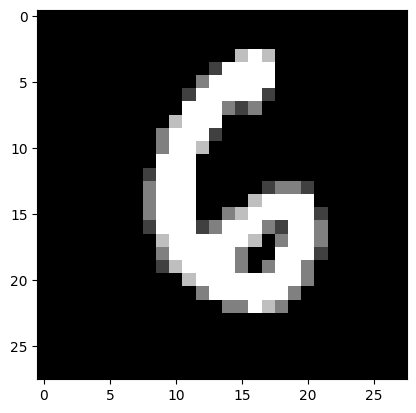

Prediction: [8]
Label: 8


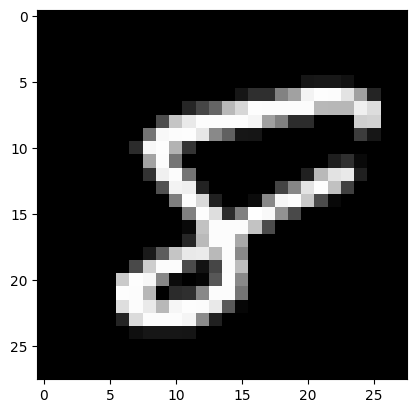

Prediction: [6]
Label: 6


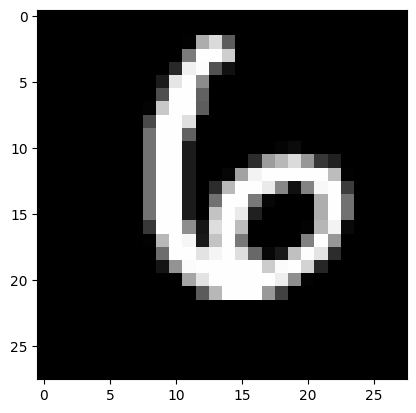

In [13]:
test_predictions(5, w1, b1, w2, b2)
test_predictions(4, w1, b1, w2, b2)
test_predictions(9, w1, b1, w2, b2)
test_predictions(1, w1, b1, w2, b2)